In [1]:
import os
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt
import sklearn.metrics
from sklearn.metrics import jaccard_score
import sys
import os
sys.path.append('..')
sys.path.append('../../src')
import torch
import torchvision
import ds_utils


In [13]:
resnet_color = 'red'
fancy_color = 'green'
random_color = 'gray'
rerun = '--'
original = '-'

In [3]:
PATCH_SIZE = 16

In [4]:
root_dir = "/mnt/nfs/home/saachij/src/CausalDomainTransfer/patch_ablation/missingness_results/superpixel_redo/"

In [5]:
import seaborn as sns
sns.set()
# sns.set(style='ticks', font='sans-serif', font_scale=1.5)
sns.set(style='ticks', font='sans-serif')
plt.style.use('ggplot')

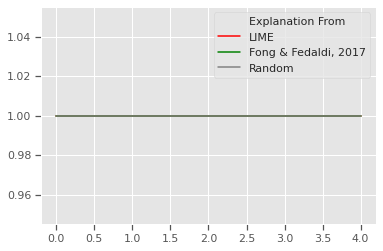

In [25]:
def get_handles():
    fig, ax = plt.subplots(1, 1)
    dummy_x = np.arange(5)
    dummy_y = np.ones(5)
    ax.plot(np.NaN, np.NaN, '.', color='none', label='Explanation From')
    for name, color, style in (
        ['LIME', resnet_color, original],
        ['Fong & Fedaldi, 2017', fancy_color, original],
        ['Random', random_color, original],
    ): 
        sns.lineplot(x=dummy_x, y=dummy_y, color=color, label=name, linestyle=style, ax=ax)
    
    handles, labels = ax.get_legend_handles_labels()
    plt.show()
    return handles, labels
handles, labels = get_handles()


In [7]:
MODEL_NAMES = ['resnet50_.5', 'resnet50', 'deit_small_resnet_aug_missingness', 'deit_small_patch16_224_missingness_.5']
lime_envelopes = {}
for model_name in MODEL_NAMES:
    ablation_dir = os.path.join(root_dir, f"superpixel_patches_{PATCH_SIZE}_0_0_0", 
                                        model_name, 'ablations')
    lime_envelope_orders = {}
    for model2_pkl in os.listdir(ablation_dir):
        if 'json' in model2_pkl or 'pkl' not in model2_pkl:
            continue
        model2 = model2_pkl.split('_order.pkl')[0]
        pickle_file = os.path.join(ablation_dir, model2_pkl)
        print("Loading", pickle_file)
        with open(pickle_file, 'rb') as f:
            lime_envelope_orders[model2] = pkl.load(f)
    lime_envelopes[model_name] = lime_envelope_orders
            

Loading /mnt/nfs/home/saachij/src/CausalDomainTransfer/patch_ablation/missingness_results/superpixel_redo/superpixel_patches_16_0_0_0/resnet50_.5/ablations/deit_small_resnet_aug_missingness_order.pkl
Loading /mnt/nfs/home/saachij/src/CausalDomainTransfer/patch_ablation/missingness_results/superpixel_redo/superpixel_patches_16_0_0_0/resnet50_.5/ablations/resnet50_.25_order.pkl
Loading /mnt/nfs/home/saachij/src/CausalDomainTransfer/patch_ablation/missingness_results/superpixel_redo/superpixel_patches_16_0_0_0/resnet50_.5/ablations/deit_small_patch16_224_retrain_.5_rerun_miss_order.pkl
Loading /mnt/nfs/home/saachij/src/CausalDomainTransfer/patch_ablation/missingness_results/superpixel_redo/superpixel_patches_16_0_0_0/resnet50_.5/ablations/deit_small_resnet_aug_order.pkl
Loading /mnt/nfs/home/saachij/src/CausalDomainTransfer/patch_ablation/missingness_results/superpixel_redo/superpixel_patches_16_0_0_0/resnet50_.5/ablations/resnet50_.75_order.pkl
Loading /mnt/nfs/home/saachij/src/CausalDom

## Ablation Test

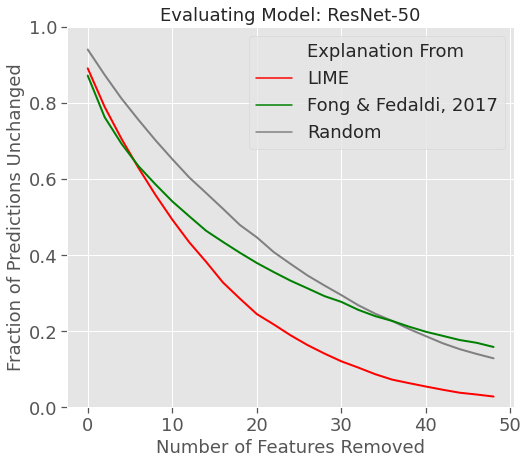

In [26]:
resnet_color = 'red'
vit_color = 'blue'
random_color = 'gray'
rerun = '--'
original = '-'
orders = {
        'resnet50':({
            'resnet50': (resnet_color, original),
#             'resnet50_rerun_pengchuan_rerun': (resnet_color, rerun),
#             'deit_small_resnet_aug_missingness': (vit_color, original),
            'random': (random_color, original),
            'fancy_resnet50': (fancy_color, original)
            }, 'ResNet-50')
    }

fig, ax = plt.subplots(1, 1, figsize=(8, 7))
base_model='resnet50'
order, title = orders[base_model]
for model_name in order.keys():
    x_vec = lime_envelopes[base_model][model_name]['num_features_vec']
    y_vec = lime_envelopes[base_model][model_name]['reverse_results'].astype(int).mean(axis=0)
    sns.lineplot(x=x_vec, y=y_vec, color=order[model_name][0],
                 linewidth=2, linestyle=order[model_name][1], ax=ax)
ax.set_title("Evaluating Model: " + title, fontsize=18)
ax.set_ylabel("Fraction of Predictions Unchanged", fontsize=18)
ax.set_xlabel("Number of Features Removed", fontsize=18)
ax.set_ylim(0,1)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax.legend([],[], frameon=False)
ax.legend(handles, labels, fontsize=18)
plt.savefig(f'fancy_lime_resnet.pdf', bbox_inches='tight')
plt.show()

In [11]:
lime_envelopes['resnet50'].keys()

dict_keys(['deit_small_resnet_aug_missingness', 'fancy_resnet50', 'deit_small_resnet_aug', 'resnet50_rerun_pengchuan_rerun', 'random', 'resnet50_.5', 'resnet50', 'resnet50_.75', 'resnet50_.25'])